# Part I - Ford Go Bike Share
## by Mohamed Najib Adan

## Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. It contains ride information like ride duration length, age and gender of the rider and where the ride started and ended.


## Preliminary Wrangling


In [197]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Loading in the data

In [198]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

Inspecting the shape and columns of the dataset

In [199]:
df.shape

(183412, 16)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [201]:
df.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
171961,957,2019-02-03 17:48:34.1060,2019-02-03 18:04:31.8160,182.0,19th Street BART Station,37.809013,-122.268247,194.0,Lakeshore Ave at Trestle Glen Rd,37.811081,-122.243268,5080,Subscriber,1995.0,Female,No
5025,300,2019-02-28 14:18:33.7930,2019-02-28 14:23:34.1010,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,5865,Subscriber,1987.0,Male,Yes
174918,604,2019-02-02 16:11:37.8930,2019-02-02 16:21:42.4500,246.0,Berkeley Civic Center,37.869060,-122.270556,268.0,Ellsworth St at Russell St,37.857490,-122.261578,3488,Subscriber,1958.0,Male,No
138906,804,2019-02-08 00:46:51.8740,2019-02-08 01:00:16.7830,183.0,Telegraph Ave at 19th St,37.808702,-122.269927,156.0,Stanford Ave at Hollis St,37.838443,-122.288665,5210,Subscriber,1980.0,Male,No
15893,626,2019-02-27 08:56:53.9580,2019-02-27 09:07:20.3030,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,243.0,Bancroft Way at College Ave,37.869360,-122.254337,5123,Subscriber,1988.0,Male,No
884,795,2019-02-28 20:05:05.3900,2019-02-28 20:18:20.8330,77.0,11th St at Natoma St,37.773507,-122.416040,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,4794,Subscriber,1989.0,Male,No
22819,276,2019-02-26 06:32:31.5180,2019-02-26 06:37:07.5850,108.0,16th St Mission BART,37.764710,-122.419957,100.0,Bryant St at 15th St,37.767100,-122.410662,6106,Subscriber,NaN,NaN,No
104465,1614,2019-02-14 08:12:21.3340,2019-02-14 08:39:15.3890,231.0,14th St at Filbert St,37.808750,-122.283282,227.0,Foothill Blvd at Fruitvale Ave,37.783757,-122.222603,6450,Subscriber,1990.0,Female,No
82756,299,2019-02-18 09:13:38.8930,2019-02-18 09:18:38.3530,60.0,8th St at Ringold St,37.774520,-122.409449,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,6514,Subscriber,1992.0,Male,No
148460,821,2019-02-06 21:47:57.8430,2019-02-06 22:01:39.7580,14.0,Clay St at Battery St,37.795001,-122.399970,49.0,S Park St at 3rd St,37.780760,-122.394989,2978,Subscriber,1976.0,Female,No


Checking if there are duplicated rows or cells missing a value

In [202]:
df.duplicated().sum()

0

In [203]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

We will convert `member_birth_year` to int64 and `user_type` to categorical, time fields to datetime and the station_ids to int.

In [262]:
# Convert birth year to int64
df.member_birth_year.fillna(0,inplace=True)
df.member_birth_year = df.member_birth_year.astype('int64')

# Convert user_types to categorical
userclasses = pd.api.types.CategoricalDtype(ordered=True, categories=df.user_type.unique())
df.user_type = df.user_type.astype(userclasses)

# Convert date time columns to datetime type
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

# Converting the station id to int64
df.start_station_id.fillna(0,inplace=True)
df.end_station_id.fillna(0,inplace=True)
df.start_station_id = df.start_station_id.astype('int64')
df.end_station_id = df.end_station_id.astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  int64         
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  int64         
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [265]:
print("Year :",df.start_time.dt.year.unique()[0])
print("Month :", df.start_time.dt.month_name().unique()[0])

Year : 2019
Month : February


The dataset is from the year 2019 February

### What is the structure of your dataset?

The dataset has 16 columns and 183412 observations

### What is/are the main feature(s) of interest in your dataset?

For me it's how age, gender, user_type related with a trip durations. I'm also interested in how the trips are spread out geographically.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Age, Gender, User type, Day of the week and Ride duration

## Univariate Exploration

### Q1: What is the distribution of `duration_sec`?

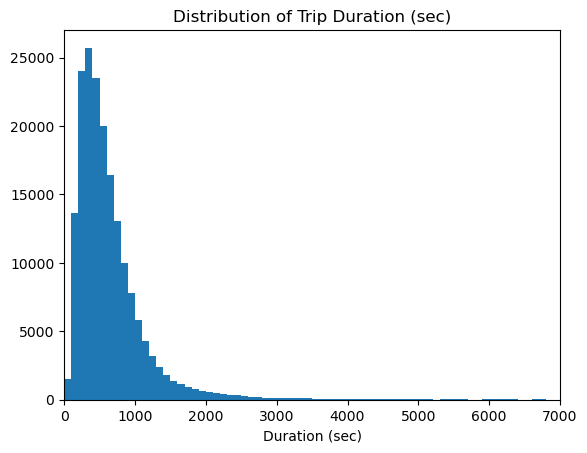

In [206]:
bins = np.arange(0,df.duration_sec.max()+100, 100)
plt.hist(x='duration_sec',data=df,bins=bins)
plt.xlim(0,7000)
plt.title('Distribution of Trip Duration (sec)')
plt.xlabel('Duration (sec)');

We can see majority of the trips are from 0sec to 1000 secs. Instead of doing mental calculation on how much it is in minutes we can convert the seconds to minutes and change the scale to a log.

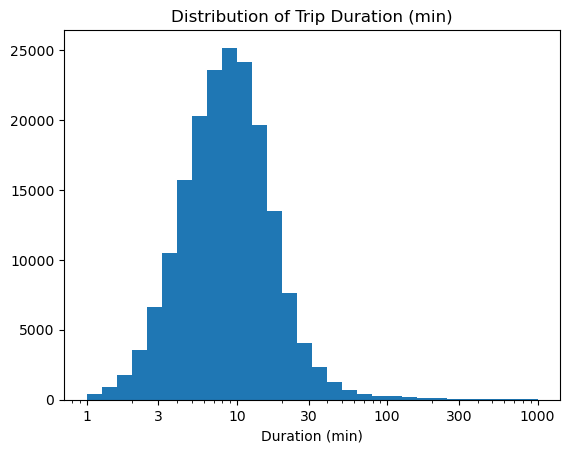

In [207]:
df['duration_min'] = df.duration_sec / 60
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks = [1,3,10,30,100,300,1000]
labels = ['{}'.format(b) for b in ticks]
plt.hist(x='duration_min',data=df,bins=bins)
plt.xscale('log')
plt.title('Distribution of Trip Duration (min)')
plt.xticks(ticks,labels)
plt.xlabel('Duration (min)');

We can clearly see the peak is at ~ 10 minute mark.

### Q2: What's the percentage of subscribers and which `user_type` consitutes the majority?

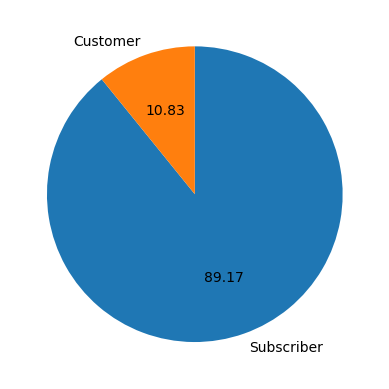

In [208]:
user_type_counts = df.user_type.value_counts()
plt.pie(user_type_counts,labels=user_type_counts.index,startangle = 90, counterclock = False,
        autopct='%.2f');

In this dataset subscribers count to 89% of the user base. It makes sense since the price for a memberships during when this data was captured is $15 per month/$149 per year. Compared to day pass tickets which costs $10 per day and single ticket pass which costs $2 per day.

In [258]:
### Bar chart function

def bar_plot(df,x,order=None,xlabel=None,ylabel=None,title=None,rotation=None, hue=None, hue_order=None):
    if not hue:
        color = sb.color_palette()[0]
    else:
        color = None
    sb.countplot(data=df,x=x,order=order,color=color,hue=hue, hue_order=hue_order);
    if xlabel:
        plt.xlabel(xlabel);
    if ylabel:
        plt.ylabel(ylabel);
    if title:
        plt.title(title);
    if rotation:
        plt.xticks(rotation = rotation)

### Q3: What is the gender distribution in this dataset

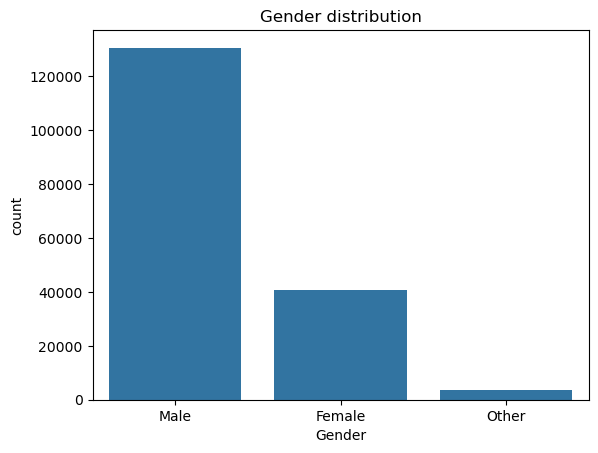

In [233]:
gender_order = df.member_gender.value_counts().index
bar_plot(df,'member_gender',gender_order,'Gender',title='Gender distribution')


Users are exceedingly male with about 120,000 while females are 40,000 users

### Q4: Whats the percentage of users who are enrolled in the Bike Share for All programs

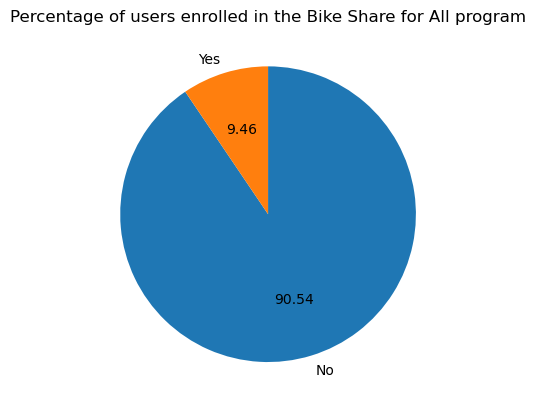

In [210]:
bike_share_counts = df.bike_share_for_all_trip.value_counts()
plt.pie(bike_share_counts,labels=bike_share_counts.index,startangle = 90, counterclock = False,
        autopct='%.2f')
plt.title('Percentage of users enrolled in the Bike Share for All program');

Most of the users are not enrolled in the Bike Share for All program

### Q5: For columns missing data, how much are they missing and whats the proportion?

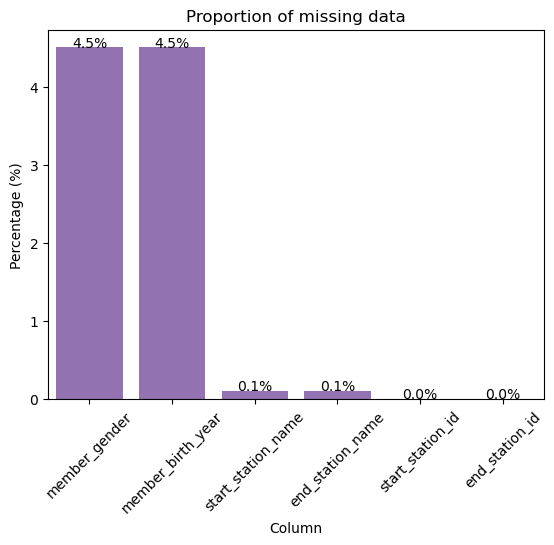

In [211]:
total_count = df.shape[0]

# Inorder to convert the member_birth_year to int we had to fillna with 0
# So that member_birth_year can show up in this visualization we will create a copy of the dataframe
# And set member_birth_year values that are 0 tp NaN
missing_data = df.copy()
missing_data.loc[missing_data.member_birth_year == 0,'member_birth_year'] = np.nan

na_counts = missing_data[['start_station_id','start_station_name','end_station_id',
                'end_station_name','member_gender','member_birth_year'
                ]].isna().sum() / total_count * 100
na_counts = na_counts.sort_values(ascending=False)
sb.barplot(x=na_counts.index.values, y=na_counts,order=na_counts.index, color=color)

plt.xticks(rotation=45) 

for i in range (na_counts.shape[0]):
    count = round(na_counts[i],1)

    plt.text(i, count+0.15, f'{count}%', ha = 'center', va='top')

plt.title('Proportion of missing data')
plt.xlabel('Column')
plt.ylabel('Percentage (%)');

`member_gender` and `member_birth_year` is missing 4.5% of the total data while the other columns are missing only 0.1%

### Q6: Distribution of `member_birth_year`

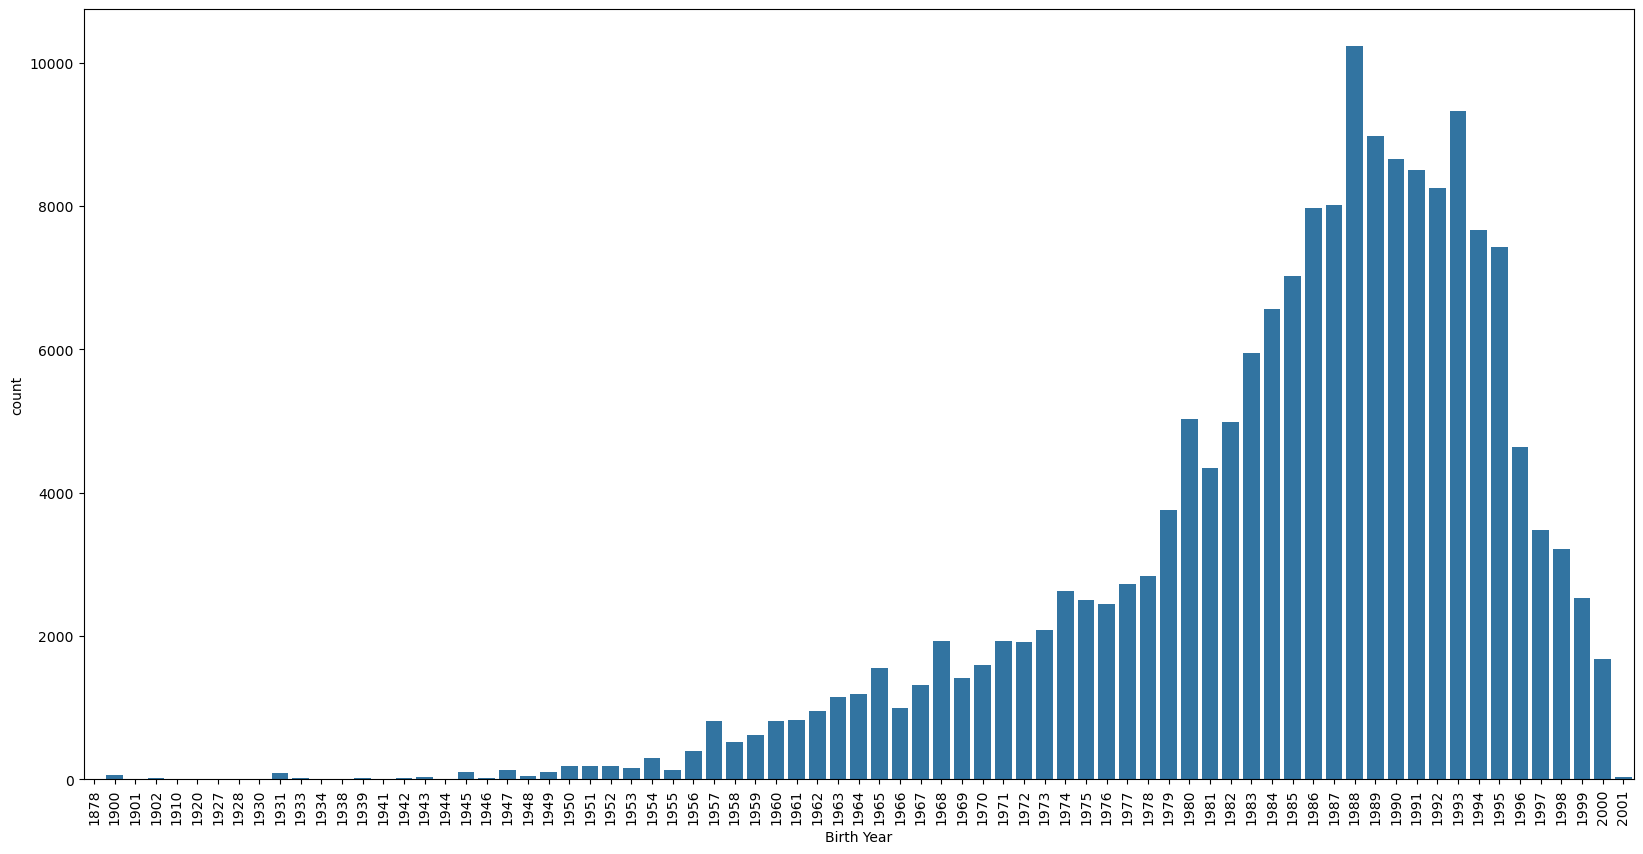

In [236]:
plt.figure(figsize=(20 , 10))
birth_year = df.query('member_birth_year>0')
bar_plot(birth_year,'member_birth_year',xlabel='Birth Year',rotation=90)

Most of the users were born around 1986 - 1995. To put this into context of age of the users when this data was collected, we will calculate it by subtracting 2019 from the `member_birth_year` since the data was from the year 2019. 

In [213]:
df['age'] = 2019 - df.member_birth_year
df.age.describe()

count    183412.000000
mean        123.633868
std         411.850439
min          18.000000
25%          27.000000
50%          32.000000
75%          40.000000
max        2019.000000
Name: age, dtype: float64

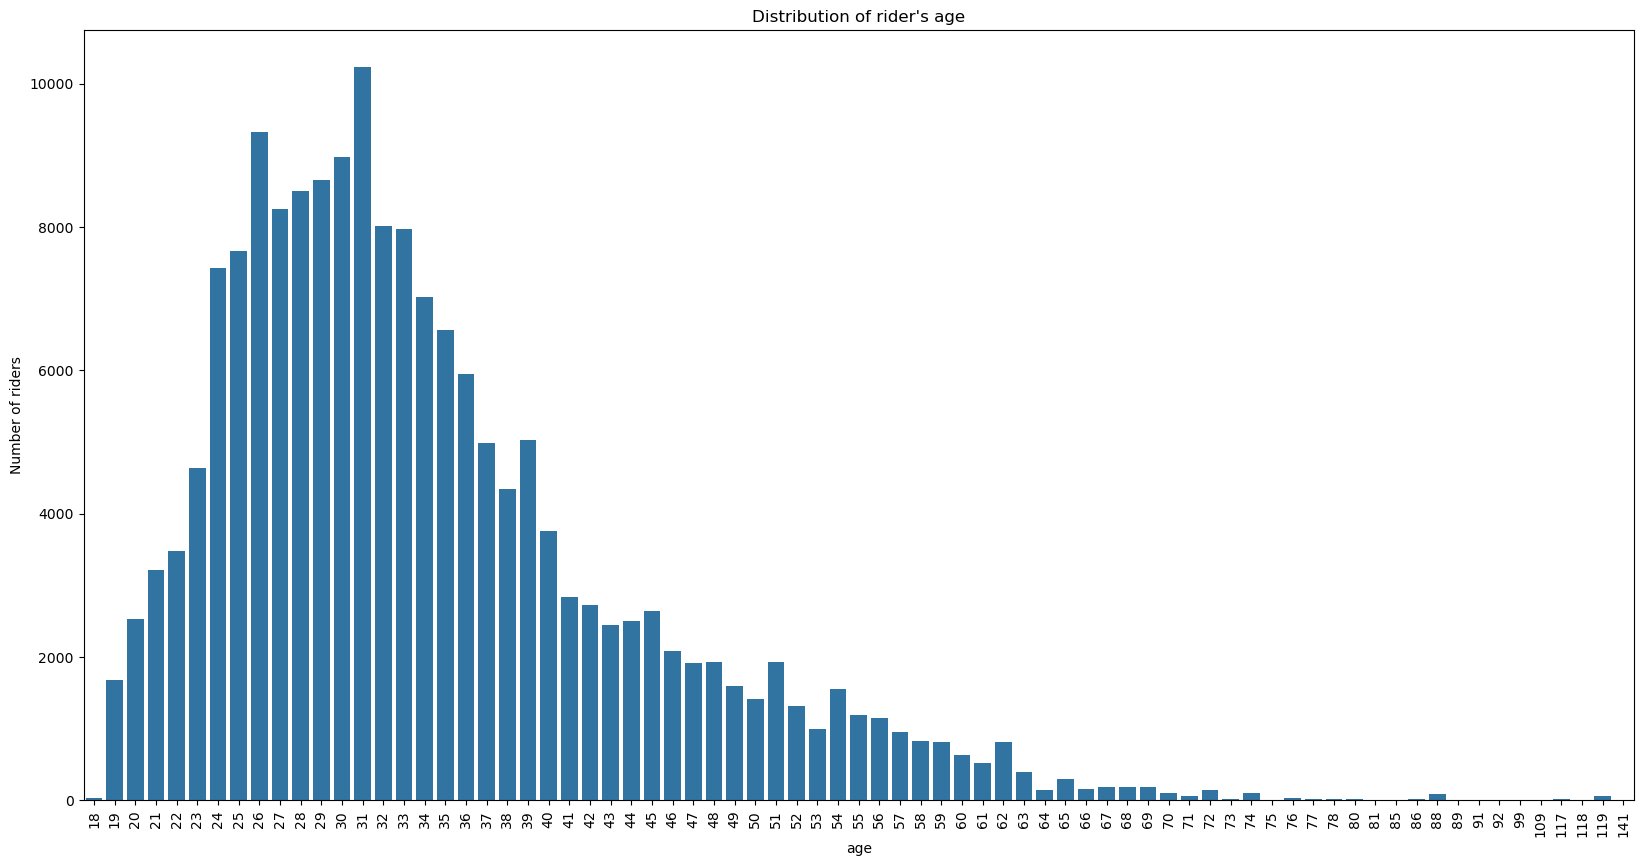

In [237]:
age_subset = df.query('age != 2019')
plt.figure(figsize=(20 , 10))
bar_plot(age_subset,'age',ylabel='Number of riders',
         title="Distribution of rider's age",rotation=90)

Suprisingly majority of the riders are in their late 20s to early 30s. We can also outliers who are older than 70 years! The youngest riders are 18 years, this is because of the rental [agreement](https://baywheels-assets.s3.amazonaws.com/terms.html) where the rider has to be 18 and above.

There is also a rider who is 141 years old! I don't know if it's a mistake when registering for the service or a user who inputted a false birth year when registering.

### Q7: Which days had more number of rides

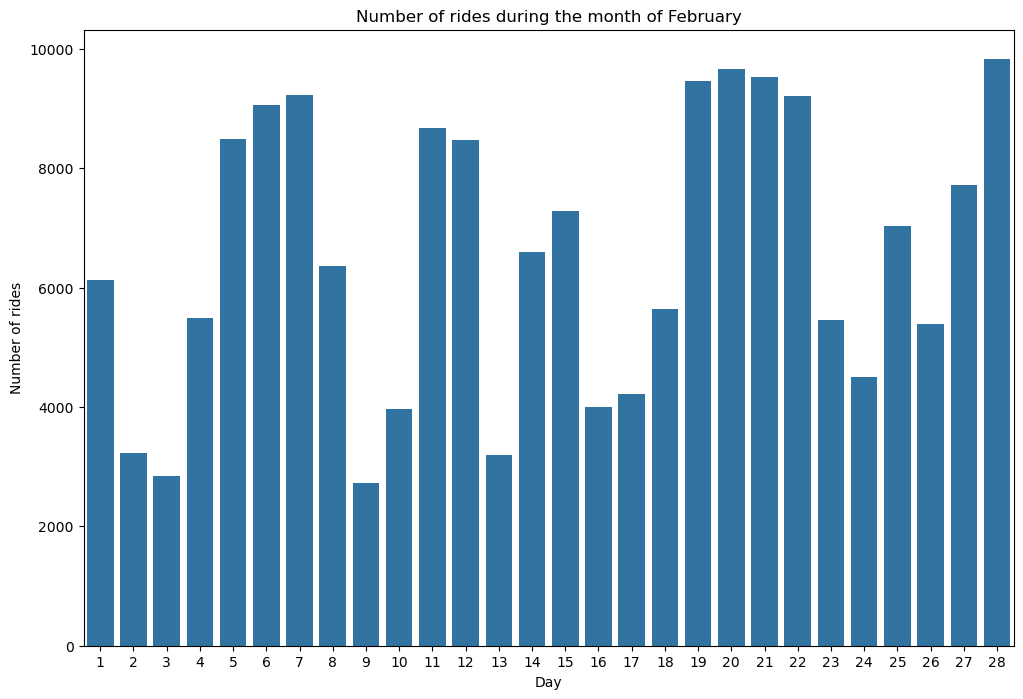

In [241]:
df['day'] = df.start_time.dt.day 
plt.figure(figsize=(12,8))
bar_plot(df,'day',xlabel='Day',
         ylabel='Number of rides',
         title='Number of rides during the month of February')

We can see a spike of riders on the days 5-7, 11-12, 19-22 and 28. February 9th recorded the lowest number of riders during that month. 
I'm also curious with which days had the most and least number of rides.

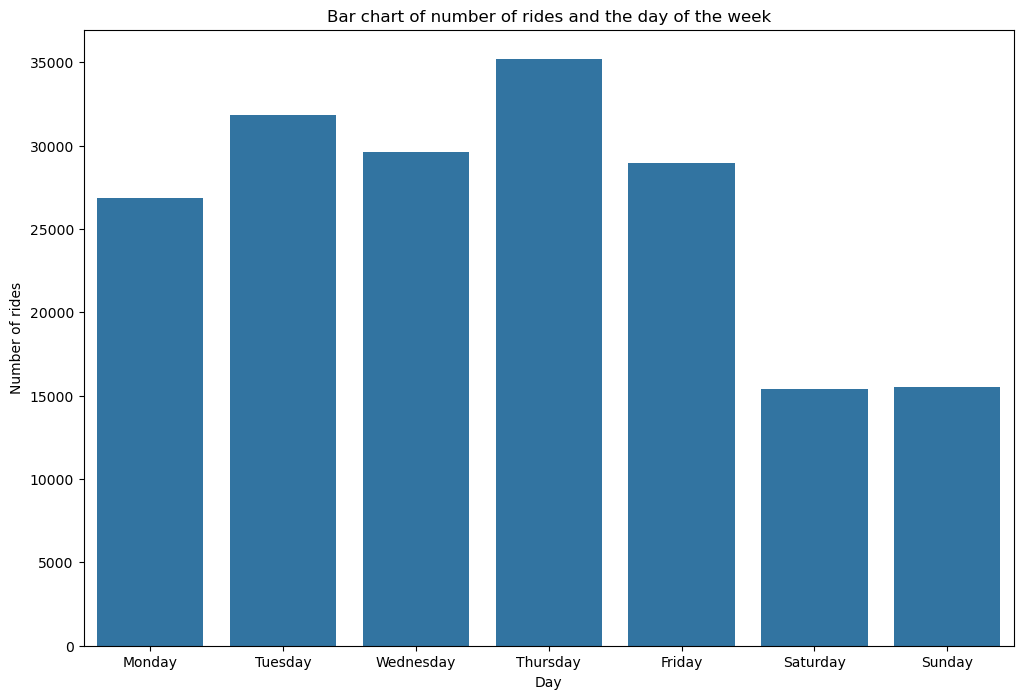

In [242]:
df['day_name'] = df.start_time.dt.day_name()
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(12,8))
bar_plot(df,'day_name',day_order,'Day','Number of rides',
         "Bar chart of number of rides and the day of the week")

Thursday had the most number of rides with the weekend having the least number of rides.

### Q8: Which bikes were mostly used

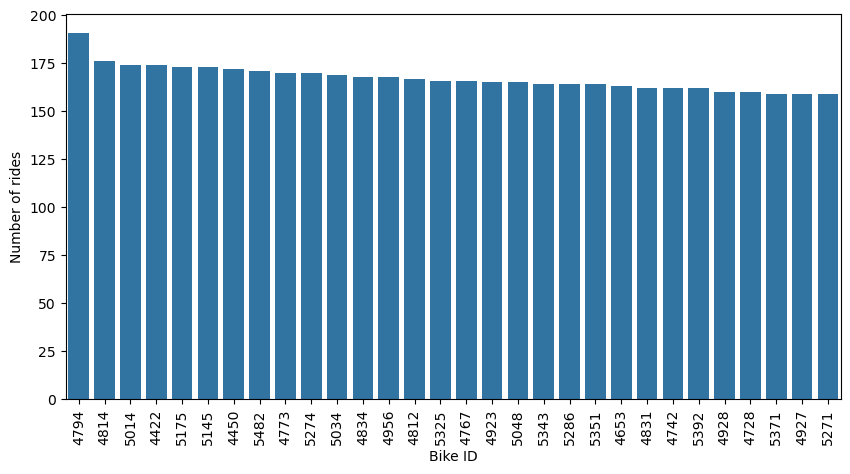

In [243]:
limit_bikes = df.bike_id.value_counts().iloc[:30]
plt.figure(figsize=(10,5))
bar_plot(df,'bike_id',limit_bikes.index,'Bike ID','Number of rides',rotation=90)

The top 30 most used bikes were used 165-175 times aside from `bike_id` 4794 was used almost 190 times in the month of February!

### Q9: Most popular station to start a trip

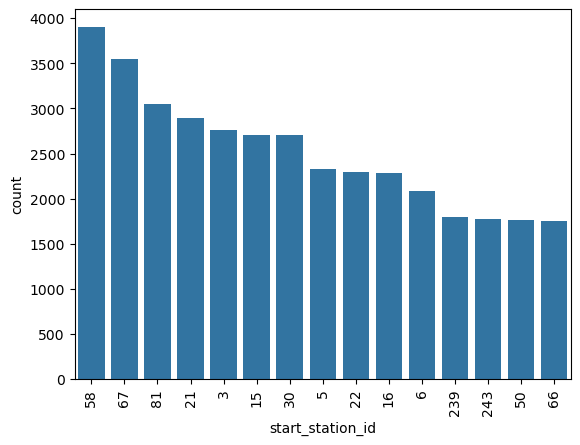

In [244]:
limit_start = df.start_station_id.value_counts().iloc[:15]
bar_plot(df,'start_station_id',limit_start.index,rotation=90)

In [219]:
df.query('start_station_id == 58').start_station_name.iloc[0]

'Market St at 10th St'

We can see the station Market St at 10th St had the most number of trips where it was the station. I wonder if it will also hold true for the station with the most ended trips.

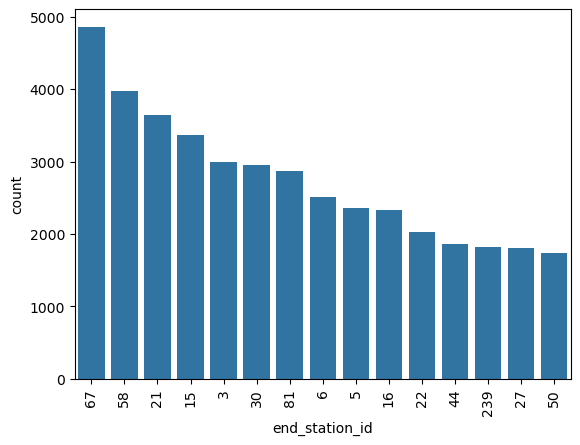

In [245]:
limit_end = df.end_station_id.value_counts().iloc[:15]
bar_plot(df,'end_station_id',limit_end.index,rotation=90)

In [221]:
df.query('end_station_id == 67').end_station_name.iloc[0]

'San Francisco Caltrain Station 2  (Townsend St at 4th St)'

This time San Francisco Caltrain Station 2 (Townsend St at 4th St) is the station with the most ended trips. Market St at 10th St is at the 2nd place this time. In the previous visualization San Francisco Caltrain Station 2 had the 2nd most started trips.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I transformed the column `duration_sec` to minutes so that the duration would make more sense from first glance and to avoid alot of mental math in converting the seconds to minutes. I also created a new column age to give a better perception of the age of the riders during the time the data was collected. I created day and day_name from the `start_time` column. 

I noticed that a certain bike was used more than often that the others. I also noticed there are riders who are 80 and above.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I noticed there were certain days (5-7, 11-12, 19-22 and 28) that had a spike of riders with February 9th having the least number of riders for that month

## Bivariate Exploration

### Q10: Relation of Ride duration to the user type

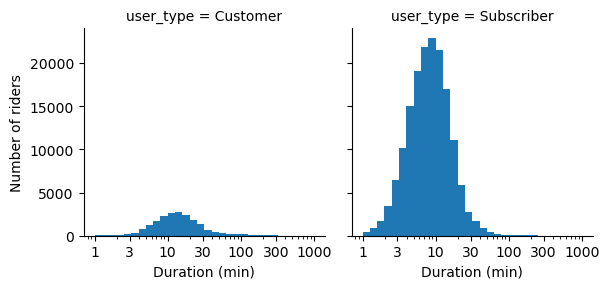

In [222]:
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks = [1,3,10,30,100,300,1000]
labels = ['{}'.format(b) for b in ticks]
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = df, col = 'user_type')
g.map(plt.hist, "duration_min",bins=bins).set(xscale='log')
g.set_axis_labels('Duration (min)','Number of riders')
g.set(xticks=ticks,xticklabels=labels);

Customers would go for a longer ride (10-30 minutes) on average compared to subscribers who would go for shorter rides (3-10 minutes). We can use a violin plot to see the distribution of ride durations

Text(0.5, 1.0, 'Violin plot of User Types and Ride Duration')

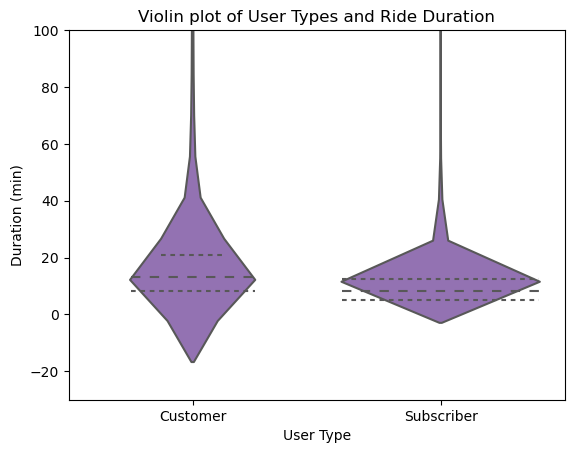

In [223]:
sb.violinplot(x=df.user_type,y=df.duration_min,color=color,inner='quartile')
plt.ylim((-30,100))
plt.ylabel('Duration (min)')
plt.xlabel('User Type')
plt.title("Violin plot of User Types and Ride Duration")

We can see that for the subscribers the mean is about 7 minutes but there is huge distribution of ride lengths on the 3rd quartile. It is then followed by a sharp decrease to around the 30 minute mark and then sharply decreases as it tails off. 
For customers, it's median meets nicely with the subscriber's 3rd quartile. Around the median we also see a huge distribution as it decreases slowly until the 40 minute mark

### Q11: Relation of Ride duration to the rider's age

<AxesSubplot:xlabel='age', ylabel='duration_min'>

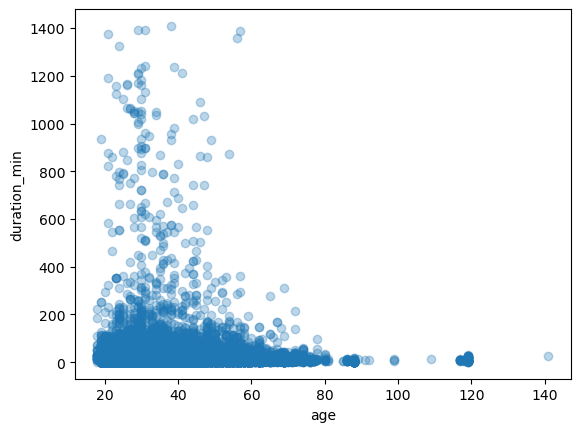

In [228]:
sb.regplot(data=age_subset, x='age',y='duration_min', y_jitter=0.08, fit_reg=False, scatter_kws= {'alpha' : 0.3})

20 - 60 year old riders went for way longer rides (more than 600 minutes!). We can see a drop of ride duration right after 60 year old riders in the range (0-200 minutes)

### Q12: How does gender and ride trip relate to each other

Text(0, 0.5, 'Duration (min)')

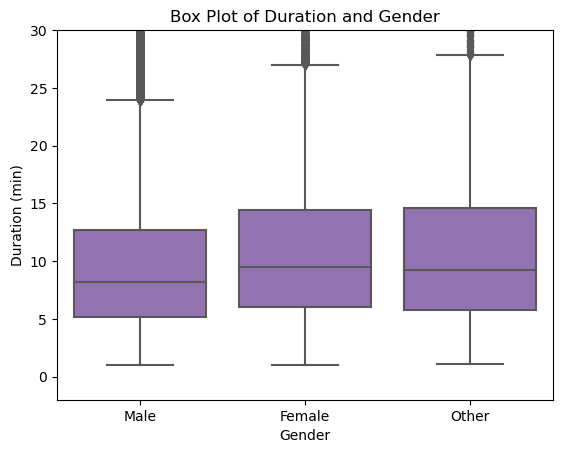

In [161]:
sb.boxplot(data=df,x='member_gender',y='duration_min',color=color,order=gender_order)
plt.ylim([-2,30]) # To ignore the outliers
plt.title('Box Plot of Duration and Gender')
plt.xlabel('Gender')
plt.ylabel('Duration (min)')

Even though male riders dominate this dataset, male riders take shorter rides (~8 minutes) compared to the other genders. 

### Q13: What are the characteristics of riders who took part in the bike share program

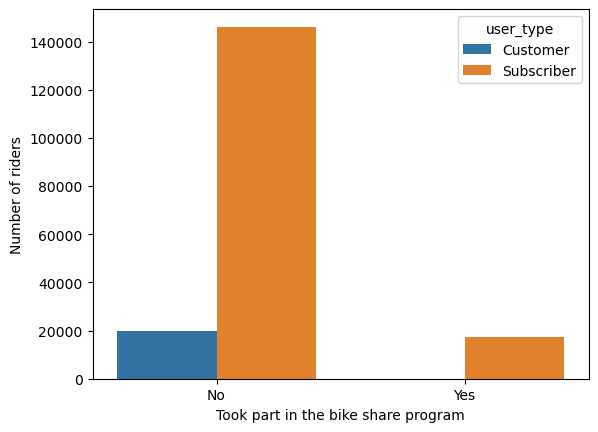

In [255]:
bar_plot(df,'bike_share_for_all_trip',xlabel='Took part in the bike share program',
         ylabel='Number of riders',hue='user_type')

Only ~20,000 subscribers took part of the bike share program. This number is even less than the total number of riders who are users!

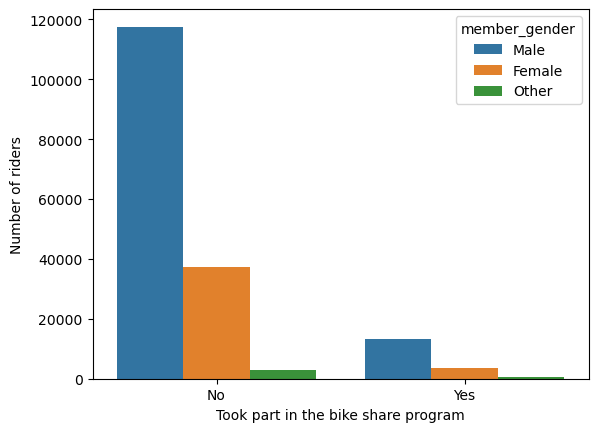

In [261]:
bar_plot(df,'bike_share_for_all_trip',xlabel='Took part in the bike share program',
         ylabel='Number of riders',hue='member_gender',hue_order=gender_order)

Males are the major demographics of riders who took part in the program.

Text(0, 0.5, 'Duration (min)')

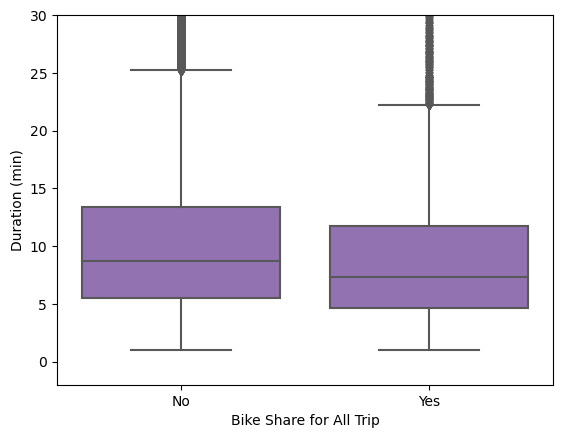

In [164]:
sb.boxplot(data=df,x='bike_share_for_all_trip',y='duration_min',color=color)
plt.ylim([-2,30]) # To ignore the outliers
plt.xlabel('Bike Share for All Trip')
plt.ylabel('Duration (min)')

The bike share for all trips are also shorter. 

### Q14: User demographics throughout the month

Text(0.5, 36.72222222222221, 'Day')

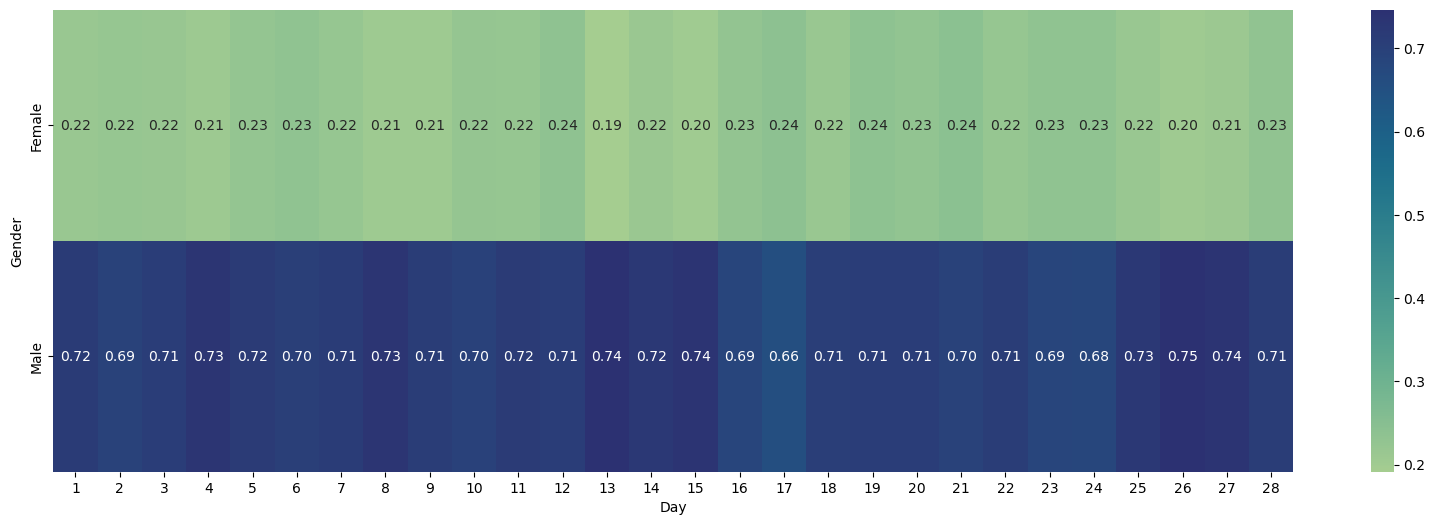

In [165]:
# Just pick male and females
genders_set = df.query("member_gender != 'Other'")
# Get the size of day and member_gender
dm_counts = genders_set.groupby(['day','member_gender']).size()
# Convert the series to dataframe
dm_counts = dm_counts.reset_index(name='count')
dm_counts = dm_counts.pivot(index='member_gender', columns='day', values='count')
# Calculate the proportions
for x in range(1,29):
    total = df.query(f'day == {x}').shape[0]
    dm_counts[x] = dm_counts[x] / total
plt.figure(figsize=(20,6))
sb.heatmap(dm_counts,annot = True, fmt = ".2f",cmap='crest')
plt.ylabel('Gender')
plt.xlabel('Day')

We can still see male riders are still dominating and the male:female ratio is mostly at 7:3

### Q15: Bike Usage per hour

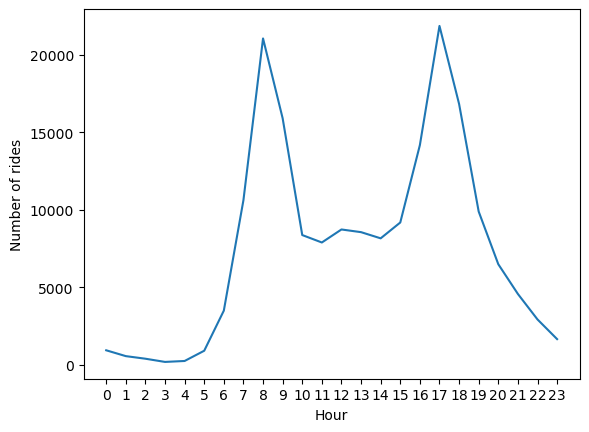

In [166]:
df['start_hour'] = df.start_time.dt.hour
hour_subset = df.groupby('start_hour').size()
hour_subset = hour_subset.reset_index(name = 'count')

sb.lineplot(data=hour_subset,x='start_hour',y='count')
plt.xticks(hour_subset.start_hour)
plt.xlabel('Hour')
plt.ylabel('Number of rides');

We can see a bimodal curve with peaks around 8am and 5pm. I won't be suprised that during the wee-hours of the night is when we have the least numbers of bike usage.

### Q16: Plotting the station on the map

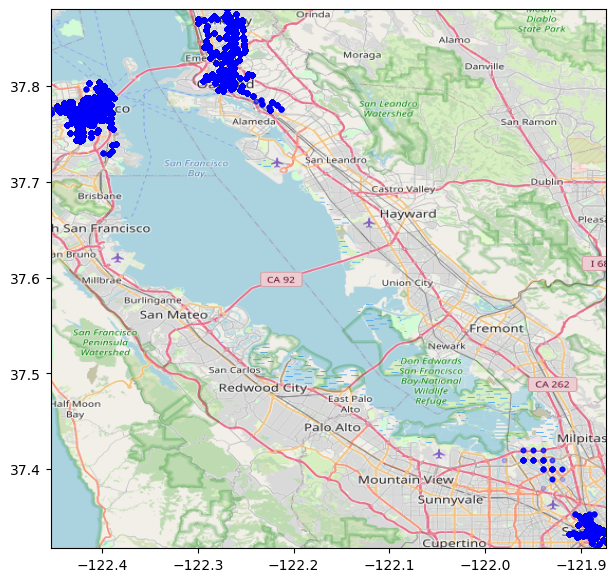

In [167]:
# Get the bounding box
BBOX = ((df.start_station_longitude.min(),df.start_station_longitude.max(),df.start_station_latitude.min(), df.start_station_latitude.max()))
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(df.start_station_longitude,df.start_station_latitude,zorder=1,alpha=0.2,c='b',s=10)
ax.set_xlim(BBOX[0],BBOX[1])
ax.set_ylim(BBOX[2],BBOX[3])
ax.imshow(plt.imread('map.png'),zorder=0,aspect='equal',extent= BBOX)

The trips are clustered around Oakland, San Francisco and way down San Jose International Airport. There is also an interesting cluster just north of the airport and next to Milpitas. We can also see where bike number 4794 rode around.

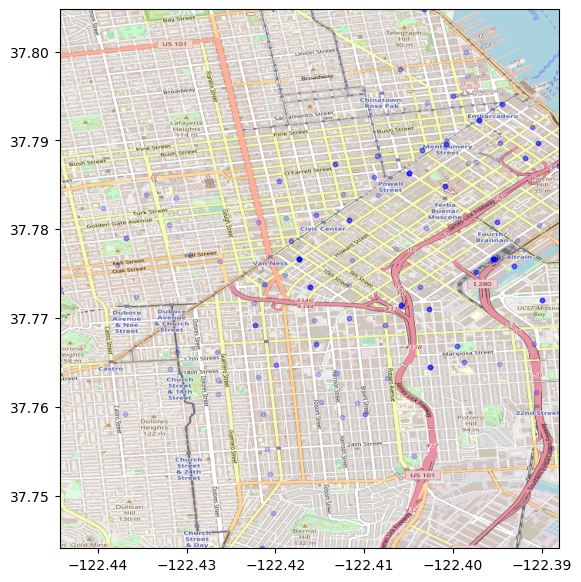

In [231]:
bike_subset = df.query('bike_id == 4794')
BBOX = ((bike_subset.start_station_longitude.min(),bike_subset.start_station_longitude.max(),bike_subset.start_station_latitude.min(), bike_subset.start_station_latitude.max()))
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(bike_subset.start_station_longitude,bike_subset.start_station_latitude,zorder=1,alpha=0.2,c='b',s=10)
ax.set_xlim(BBOX[0],BBOX[1])
ax.set_ylim(BBOX[2],BBOX[3])
ax.imshow(plt.imread('map_1.png'),zorder=0,aspect='equal',extent= BBOX)

Most of it's trips are around the busy market street and on the subway station at King Street.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

I observed that customers would go for a longer ride on average as compared to the subscribers. I was suprised male riders on general took shorter rides too even though they are the majority.

0800hr and 1700hr are the peak hours with the most number of riders. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Subscribers were only the only `user_type` who took part in the bike share program. Male riders are the major demographic of riders who took part in the program. 

The trips are clustered around Oakland, San Francisco and way down San Jose International Airport. There is also an interesting cluster just north of the airport and next to Milpitas.

## Multivariate Exploration

### Q17: Bike Usage per Hour demographics

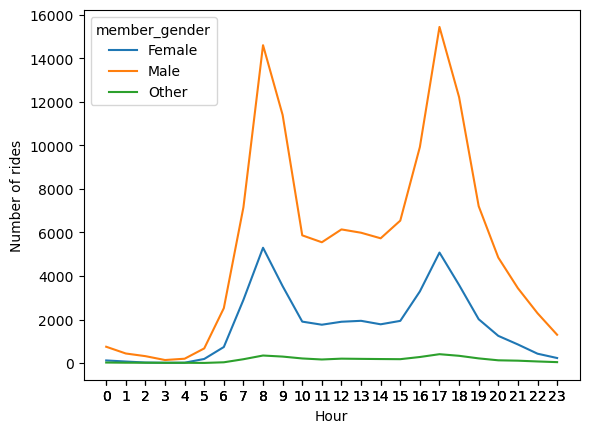

In [104]:
hour_subset = df.groupby(['start_hour','member_gender']).size()
hour_subset = hour_subset.reset_index(name = 'count')

sb.lineplot(data=hour_subset,x='start_hour',y='count',hue='member_gender')
plt.xticks(hour_subset.start_hour)
plt.xlabel('Hour')
plt.ylabel('Number of rides');

The story is still the same as before but we can see a small spike of male riders at around the Noon mark

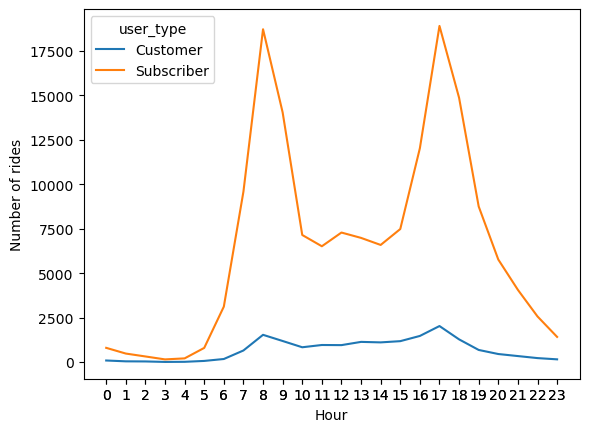

In [111]:
hour_subset = df.groupby(['start_hour','user_type']).size()
hour_subset = hour_subset.reset_index(name = 'count')

sb.lineplot(data=hour_subset,x='start_hour',y='count',hue='user_type')
plt.xticks(hour_subset.start_hour)
plt.xlabel('Hour')
plt.ylabel('Number of rides');

The spike is also more pronounced here with subscribers. Maybe it's because of the sheer number of those demographics.

### Q18: Looking at how long the rides are with different demographics

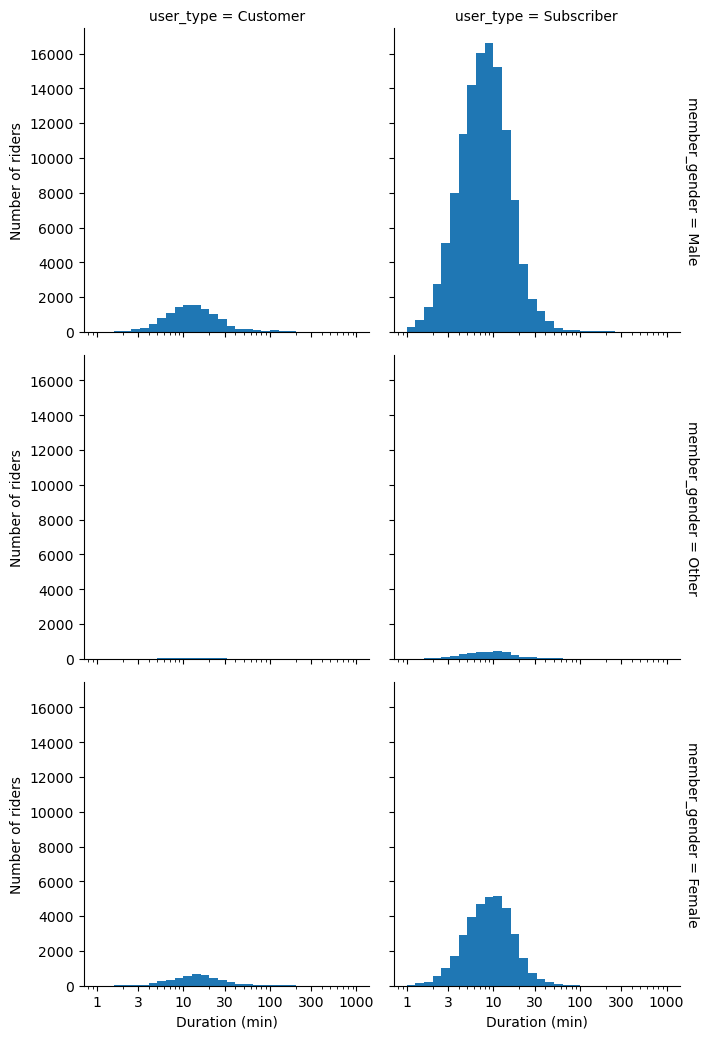

In [118]:
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks = [1,3,10,30,100,300,1000]
labels = ['{}'.format(b) for b in ticks]
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = df, col = 'user_type',row='member_gender',margin_titles=True,height=3.5)
g.map(plt.hist, "duration_min",bins=bins).set(xscale='log')
g.set_axis_labels('Duration (min)','Number of riders')
g.set(xticks=ticks,xticklabels=labels);

We can see a small number of female customer riders that went for a long ride(100-300 minute mark). We also alot of rides that fall on that range on the male riders that are subscribers.  

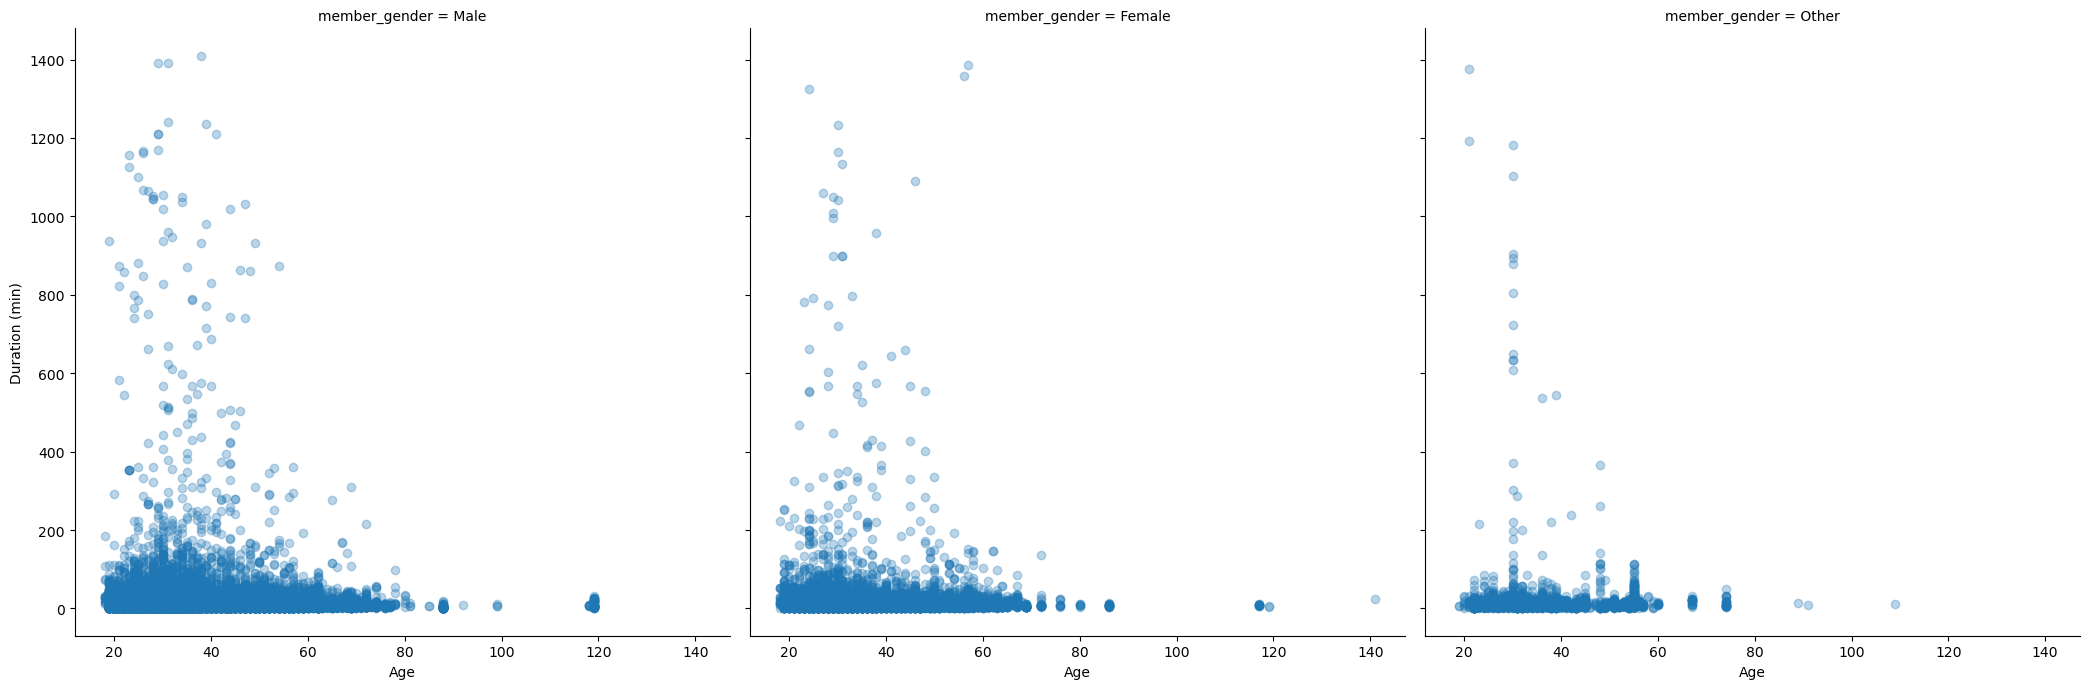

In [195]:
g = sb.FacetGrid(data = df, col ='member_gender',margin_titles=True,height=7,col_order=gender_order)
g.map(sb.regplot, "age", "duration_min", y_jitter=0.08, fit_reg = False, scatter_kws = {'alpha': 0.3})
g.set_ylabels('Duration (min)')
g.set_xlabels('Age')

We can see male riders who are 120 years old! And a female rider who is 140 years old too! 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Female customer riders went for a long ride (100 - 300 minutes)

### Were there any interesting or surprising interactions between features?

The small spike of male riders around the noon mark. This isn't seen with the other genders. 

## Conclusions

90% of the riders in this datasets are subscribed to the Ford Go share bike program, with males making the majority of the riders in this dataset. Generally riders are in their late 20s to early 30s.

The weekend had the least number of riders with Thursday having the most number of riders. The stations San Francisco Caltrain Station 2  (Townsend St at 4th St) and Market St at 10th St are the most popular stations to start and end rides. 

Customers would go on longer rides as compared to subscribers. And in the point of longer rides, females also go on longer rides with male riders taking shorter rides.

At 0800hr and 1700hr had the most number of rides. The trips were clustered around the bay area of San Fransico, Oakland and San Jose International Airport.